In [0]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-28 01:07:33--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 95.100.196.146, 2a02:26f0:fe00:1be::e59, 2a02:26f0:fe00:1b5::e59
Connecting to download.microsoft.com (download.microsoft.com)|95.100.196.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   195MB/s    in 4.5s    

2020-04-28 01:07:38 (174 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [17]:
import os, shutil

original_cat_dataset_dir = '/tmp/PetImages/Cat/'
original_dog_dataset_dir = '/tmp/PetImages/Dog/'

base_dir = '/tmp/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: ignored

In [0]:
file_name = '/tmp/cats_and_dogs_small/train/cats/666.jpg'
os.remove(file_name)

In [20]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_cat_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_cat_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_cat_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dog_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dog_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dog_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

FileNotFoundError: ignored

In [8]:
print('train cat image:', len(os.listdir(train_cats_dir)))
print('train cat image:', len(os.listdir(train_dogs_dir)))
print('validation cat image:', len(os.listdir(validation_cats_dir)))
print('validation dog image:', len(os.listdir(validation_dogs_dir)))
print('test cat image:', len(os.listdir(test_cats_dir)))
print('test dog image:', len(os.listdir(test_dogs_dir)))

train cat image: 1000
train cat image: 1000
validation cat image: 500
validation dog image: 500
test cat image: 500
test dog image: 500


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history = model.fit_generator(
    train_generator, steps_per_epoch=100, epochs=30, 
    validation_data=validation_generator, validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6614 - acc: 0.6118 - val_loss: 0.6375 - val_acc: 0.6470
Epoch 2/30
100/100 [==============================] - 8s 81ms/step - loss: 0.6191 - acc: 0.6628 - val_loss: 0.4864 - val_acc: 0.6690
Epoch 3/30
100/100 [==============================] - 8s 81ms/step - loss: 0.5795 - acc: 0.7014 - val_loss: 0.5894 - val_acc: 0.6890
Epoch 4/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5407 - acc: 0.7299 - val_loss: 0.5271 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5062 - acc: 0.7574 - val_loss: 0.4855 - val_acc: 0.7120
Epoch 6/30
100/100 [==============================] - 8s 79ms/step - loss: 0.4723 - acc: 0.7784 - val_loss: 0.4941 - val_acc: 0.7260
Epoch 7/30
100/100 [==============================] - 8s 79ms/step - loss: 0.4399 - acc: 0.7974 - val_loss: 0.4373 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 8s 79ms/step - 

In [27]:
i = 0

for data_batch, labels_batch in train_generator:
  print('batch data size : ', data_batch.shape)
  print('batch label size : ', labels_batch.shape)
  if i >= 4:
    break
  i+=1

batch data size :  (20, 150, 150, 3)
batch label size :  (20,)
batch data size :  (20, 150, 150, 3)
batch label size :  (20,)
batch data size :  (20, 150, 150, 3)
batch label size :  (20,)
batch data size :  (20, 150, 150, 3)
batch label size :  (20,)
batch data size :  (20, 150, 150, 3)
batch label size :  (20,)


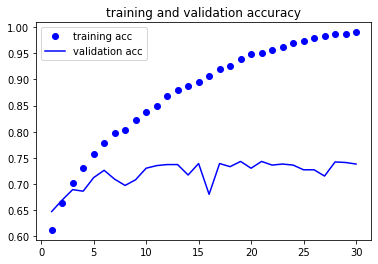

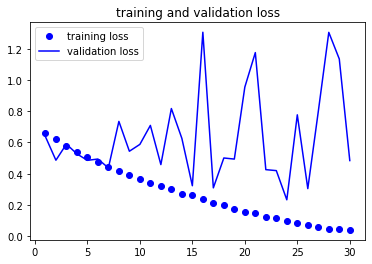

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [36]:
os.listdir(train_cats_dir)

['285.jpg',
 '926.jpg',
 '291.jpg',
 '730.jpg',
 '209.jpg',
 '791.jpg',
 '108.jpg',
 '274.jpg',
 '517.jpg',
 '957.jpg',
 '385.jpg',
 '608.jpg',
 '556.jpg',
 '462.jpg',
 '757.jpg',
 '201.jpg',
 '338.jpg',
 '288.jpg',
 '572.jpg',
 '629.jpg',
 '912.jpg',
 '907.jpg',
 '150.jpg',
 '815.jpg',
 '550.jpg',
 '659.jpg',
 '461.jpg',
 '827.jpg',
 '188.jpg',
 '37.jpg',
 '618.jpg',
 '480.jpg',
 '97.jpg',
 '318.jpg',
 '140.jpg',
 '177.jpg',
 '143.jpg',
 '101.jpg',
 '486.jpg',
 '840.jpg',
 '333.jpg',
 '319.jpg',
 '735.jpg',
 '13.jpg',
 '623.jpg',
 '70.jpg',
 '546.jpg',
 '948.jpg',
 '11.jpg',
 '196.jpg',
 '600.jpg',
 '247.jpg',
 '356.jpg',
 '731.jpg',
 '230.jpg',
 '395.jpg',
 '457.jpg',
 '771.jpg',
 '483.jpg',
 '722.jpg',
 '621.jpg',
 '660.jpg',
 '79.jpg',
 '673.jpg',
 '702.jpg',
 '186.jpg',
 '162.jpg',
 '239.jpg',
 '883.jpg',
 '847.jpg',
 '663.jpg',
 '574.jpg',
 '950.jpg',
 '43.jpg',
 '554.jpg',
 '355.jpg',
 '5.jpg',
 '755.jpg',
 '984.jpg',
 '721.jpg',
 '523.jpg',
 '199.jpg',
 '975.jpg',
 '543.jpg',
 

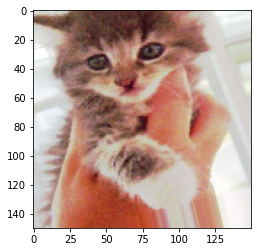

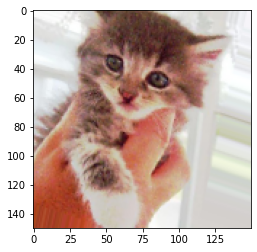

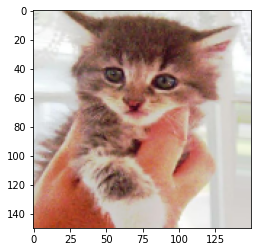

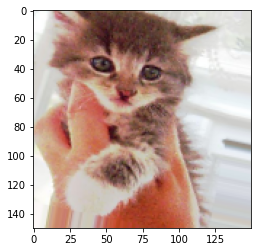

In [38]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [43]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=100, validation_data=validation_generator, validation_steps=50)


Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6855 - acc: 0.5417 - val_loss: 0.7299 - val_acc: 0.5292
Epoch 2/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6593 - acc: 0.6079 - val_loss: 0.6575 - val_acc: 0.6379
Epoch 3/100
100/100 [==============================] - 12s 122ms/step - loss: 0.6159 - acc: 0.6620 - val_loss: 0.5711 - val_acc: 0.6440
Epoch 4/100
100/100 [==============================] - 12s 124ms/step - loss: 0.5703 - acc: 0.7034 - val_loss: 0.7556 - val_acc: 0.6785
Epoch 5/100
100/100 [==============================] - 12s 119ms/step - loss: 0.5381 - acc: 0.7325 - val_loss: 0.5455 - val_acc: 0.7075
Epoch 6/100
100/100 [==============================] - 13s 129ms/step - loss: 0.5173 - acc: 0.7396 - val_loss: 0.6966 - val_acc: 0.6727
Epoch 7/100
100/100 [==============================] - 12s 123ms/step - loss: 0.4819 - acc: 0.7644 -

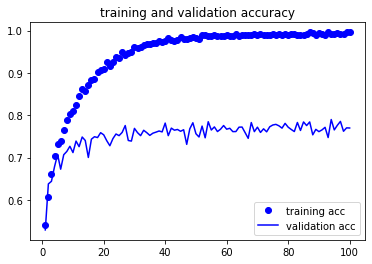

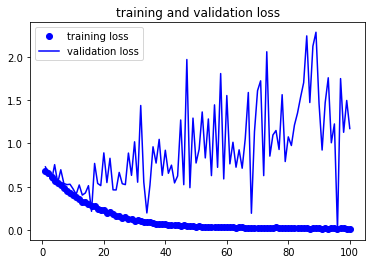

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [46]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [48]:
os.listdir(test_cats_dir)

['1715.jpg',
 '1630.jpg',
 '1806.jpg',
 '1705.jpg',
 '1666.jpg',
 '1932.jpg',
 '1716.jpg',
 '1873.jpg',
 '1819.jpg',
 '1683.jpg',
 '1983.jpg',
 '1665.jpg',
 '1655.jpg',
 '1847.jpg',
 '1962.jpg',
 '1741.jpg',
 '1551.jpg',
 '1803.jpg',
 '1765.jpg',
 '1685.jpg',
 '1825.jpg',
 '1609.jpg',
 '1711.jpg',
 '1900.jpg',
 '1543.jpg',
 '1761.jpg',
 '1830.jpg',
 '1651.jpg',
 '1632.jpg',
 '1708.jpg',
 '1736.jpg',
 '1939.jpg',
 '1987.jpg',
 '1801.jpg',
 '1588.jpg',
 '1798.jpg',
 '1670.jpg',
 '1539.jpg',
 '1928.jpg',
 '1773.jpg',
 '1824.jpg',
 '1720.jpg',
 '1502.jpg',
 '1511.jpg',
 '1693.jpg',
 '1520.jpg',
 '1865.jpg',
 '1577.jpg',
 '1648.jpg',
 '1777.jpg',
 '1559.jpg',
 '1677.jpg',
 '1572.jpg',
 '1643.jpg',
 '1944.jpg',
 '1611.jpg',
 '1626.jpg',
 '1571.jpg',
 '1952.jpg',
 '1872.jpg',
 '1600.jpg',
 '1880.jpg',
 '1703.jpg',
 '1919.jpg',
 '1918.jpg',
 '1654.jpg',
 '1948.jpg',
 '1536.jpg',
 '1528.jpg',
 '1727.jpg',
 '1585.jpg',
 '1959.jpg',
 '1864.jpg',
 '1804.jpg',
 '1681.jpg',
 '1656.jpg',
 '1724.jpg',

In [53]:
from keras.preprocessing import image
import numpy as np

img_path = test_cats_dir + r'/1700.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


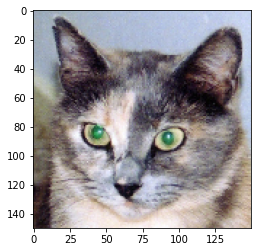

In [54]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
activations = activation_model.predict(img_tensor)

In [57]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


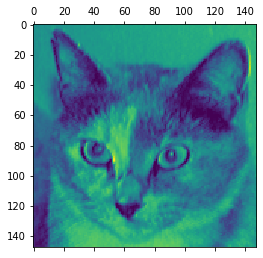

In [58]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

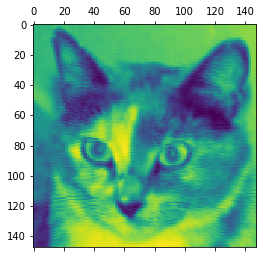

In [59]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


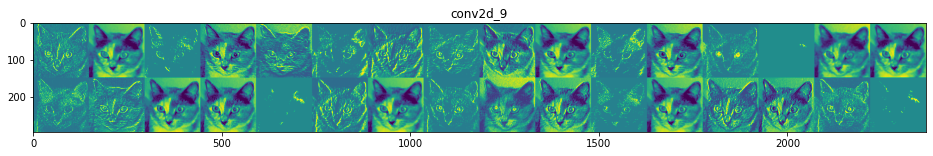

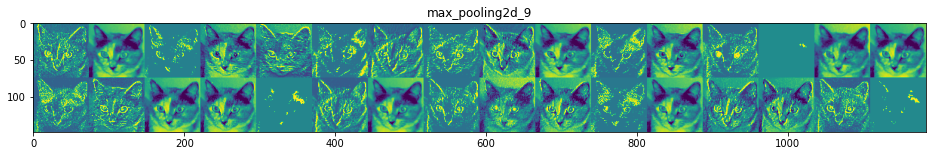

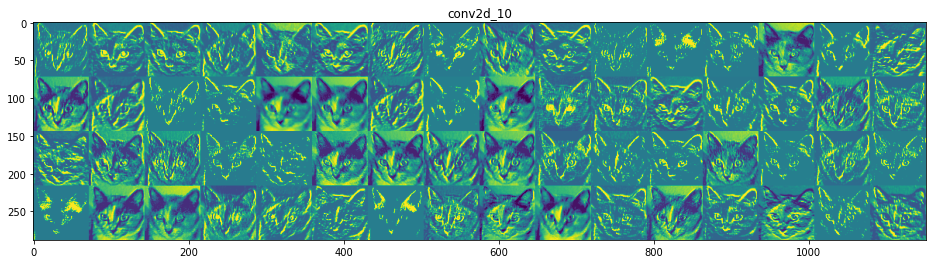

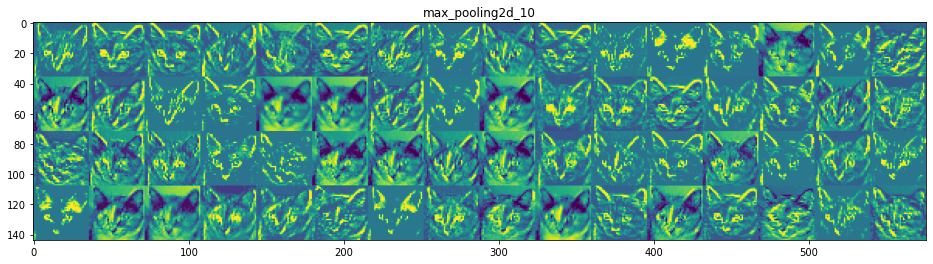

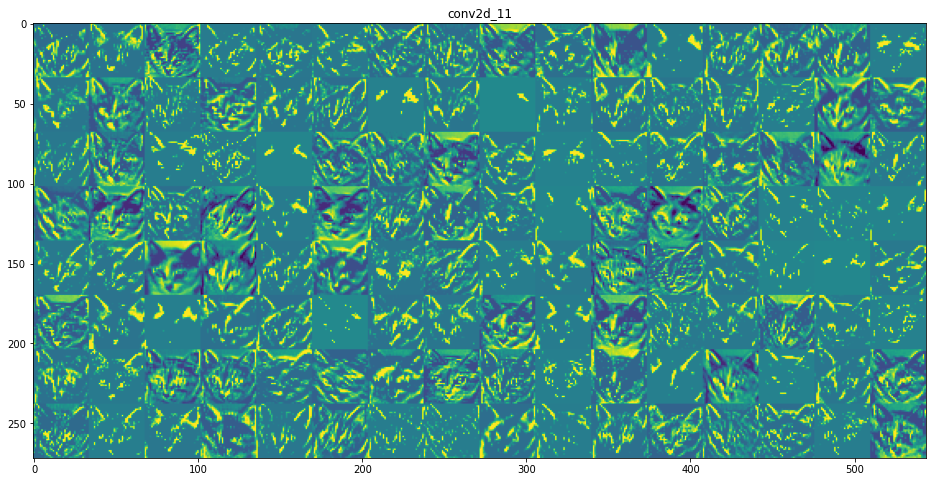

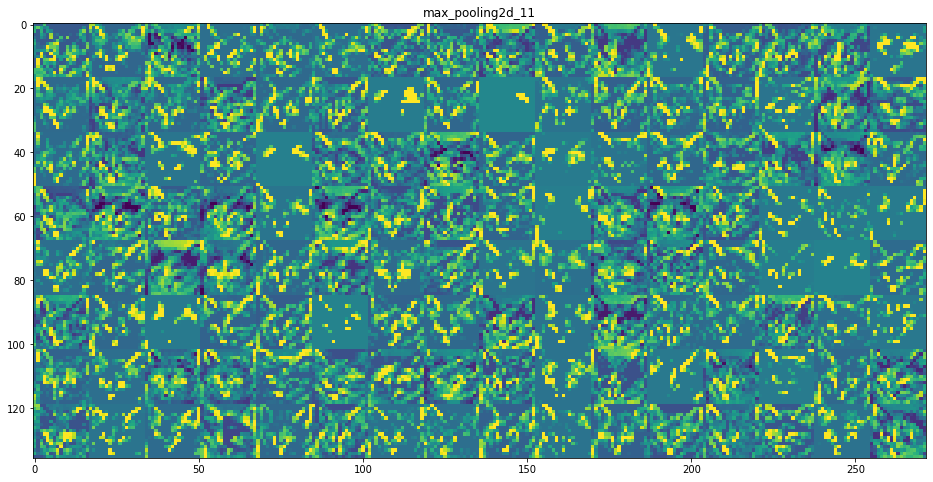

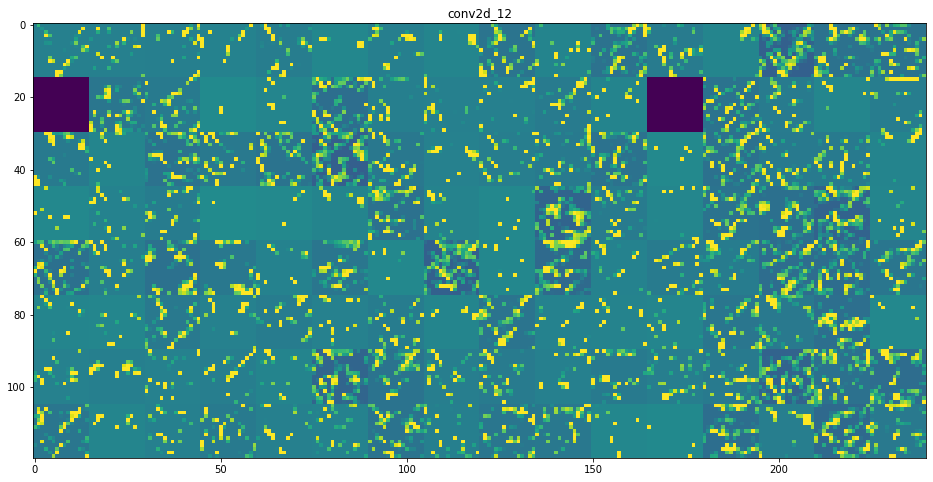

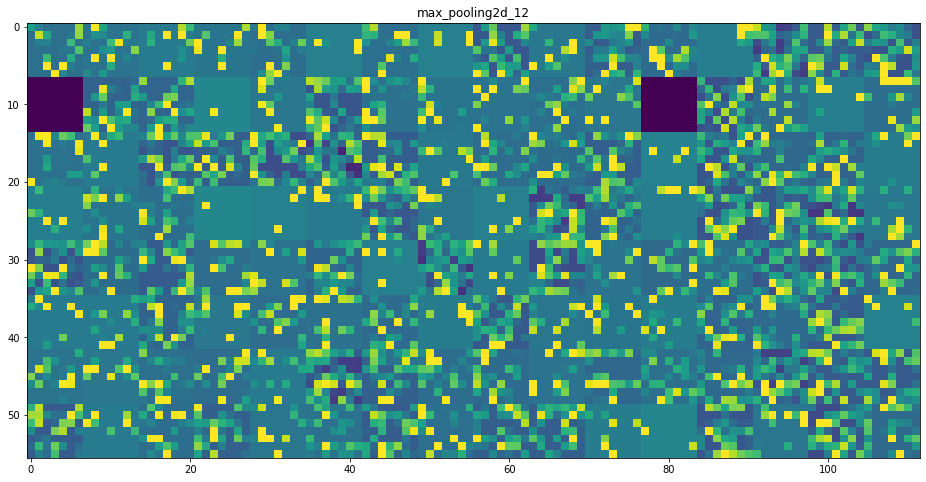

In [60]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, 
                   row * size : (row + 1) * size] = channel_image
  scale = 1./size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()